In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/zhd/linux-fonts/simsun.ttc", size=14)
plt.rcParams['pdf.fonttype'] = 42

#label在图示(legend)中显示。若为数学公式，则最好在字符串前后添加"$"符号
#color：b:blue、g:green、r:red、c:cyan、m:magenta、y:yellow、k:black、w:white、、、
#线型：-  --   -.  :    ,
#marker：.  ,   o   v    <    *    +    1
#hatch: /, //, --, +, x, \\

color1 = tuple(x / 255 for x in [72, 68, 95])
color2 = tuple(x / 255 for x in [37, 130, 121])
color3 = tuple(x / 255 for x in [231, 175, 48])
color4 = tuple(x / 255 for x in [184, 2, 0])

In [193]:
# 分布式事务
# 参与者数量对吞吐量/延迟的影响
participants = np.array([1, 2, 3])
operations10_delay1_tps = np.array([1409.713, 448.020, 400.930])
operations10_delay1_txn_latency = np.array([6784.068, 21852.627, 24439.804]) / 1000
operations10_delay1_commit_latency = np.array([3504.532, 7332.197, 7599.489]) / 1000

operations10_delay20_tps = np.array([167.603, 33.830, 30.220])
operations10_delay20_txn_latency = np.array([58719.350, 294498.312, 329532.705]) / 1000
operations10_delay20_commit_latency = np.array([55505.056, 121412.520, 121671.045]) / 1000

operations10_delay50_tps = np.array([70.160, 13.700, 12.260])
operations10_delay50_txn_latency = np.array([141744.652, 726094.698, 808979.967]) / 1000
operations10_delay50_commit_latency = np.array([138213.202, 303293.435, 303156.455]) / 1000

# 操作数量对吞吐量/延迟的影响
operations = np.array([10, 20, 30, 40, 50, 60])
participants2_delay1_tps = np.array([448.020, 274.510, 197.503, 154.280, 127.213, 107.300])
participants2_delay1_txn_latency = np.array([21852.627, 35829.455, 49903.104, 63998.242, 77990.485, 92656.006]) / 1000
participants2_delay1_commit_latency = np.array([7332.197, 7260.511, 7228.484, 7237.575, 7235.407, 7280.345]) / 1000

participants2_delay20_tps = np.array([33.830, 21.413, 15.523, 12.170, 10.123, 8.550])
participants2_delay20_txn_latency = np.array([294498.312, 466146.798, 642986.737, 819813.078, 985671.037, 1165032.370]) / 1000
participants2_delay20_commit_latency = np.array([121412.520, 121321.152, 121109.055, 121487.271, 121720.263, 121471.368]) / 1000

participants2_delay50_tps = np.array([13.700, 8.577, 0, 5.000, 4.107, 3.460])
participants2_delay50_txn_latency = np.array([726094.698, 1161488.184, 0, 1988718.459, 2423416.573, 2869003.081]) / 1000
participants2_delay50_commit_latency = np.array([303293.435, 302953.944, 0, 303682.379, 302651.178, 301678.582]) / 1000

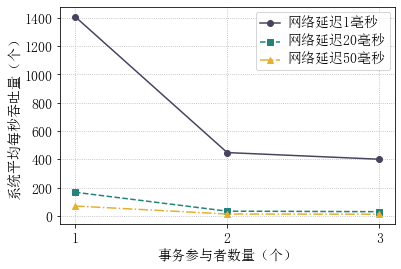

In [185]:
# x轴参与者数量，y轴吞吐量，图例网络延迟，折线图
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([1, 2, 3])
plt.plot(x, operations10_delay1_tps, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, operations10_delay20_tps, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, operations10_delay50_tps, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务参与者数量（个）", fontproperties=font)
plt.ylabel("系统平均每秒吞吐量（个）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

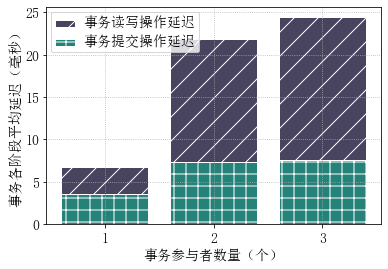

In [194]:
# x轴参与者数量，y轴延迟，堆叠柱状图，图例延迟类型
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([1, 2, 3])
bar_rw_latency = plt.bar(x, operations10_delay1_txn_latency, label="事务读写操作延迟", color=color1, edgecolor="white", hatch="/")
bar_commit_latency = plt.bar(x, operations10_delay1_commit_latency, label="事务提交操作延迟", color=color2, edgecolor="white", hatch="+")
plt.xticks(x, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务参与者数量（个）", fontproperties=font)
plt.ylabel("事务各阶段平均延迟（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

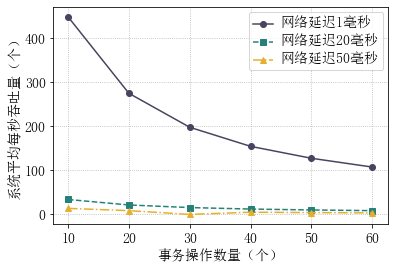

In [195]:
# x轴操作数量，y轴吞吐量，折线图，图例网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([10, 20, 30, 40, 50, 60])
plt.plot(x, participants2_delay1_tps, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, participants2_delay20_tps, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, participants2_delay50_tps, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务操作数量（个）", fontproperties=font)
plt.ylabel("系统平均每秒吞吐量（个）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

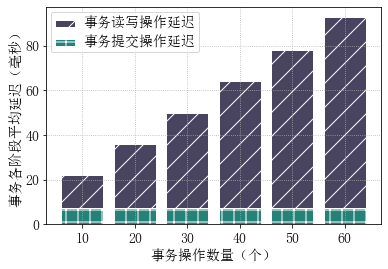

In [196]:
# x轴操作数量，y轴延迟，堆叠柱状图，图例延迟类型
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([1, 2, 3, 4, 5, 6])
x_label = np.array([10, 20, 30, 40, 50, 60])
bar_rw_latency = plt.bar(x, participants2_delay1_txn_latency, label="事务读写操作延迟", color=color1, edgecolor="white", hatch="/")
bar_commit_latency = plt.bar(x, participants2_delay1_commit_latency, label="事务提交操作延迟", color=color2, edgecolor="white", hatch="+")
plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务操作数量（个）", fontproperties=font)
plt.ylabel("事务各阶段平均延迟（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

In [197]:
# 冲突事务
# 是否使用elr/网络延迟对吞吐量的影响
delays = np.array([1, 20, 50])
concurrency10_operations10_elr_tps = np.array([1831.110, 409.020, 187.400])
concurrency10_operations10_elr_txn_latency = np.array([27983.022, 148688.003, 339809.920]) / 1000
concurrency10_operations10_elr_lock_latency = np.array([20671.850, 86925.635, 188917.475]) / 1000

concurrency10_operations10_noelr_tps = np.array([1321.993, 166.100, 71.167])
concurrency10_operations10_noelr_txn_latency = np.array([37658.749, 329506.138, 771365.919]) / 1000
concurrency10_operations10_noelr_lock_latency = np.array([30980.335, 269857.179, 629637.509]) / 1000

# 并发事务数量对平均延迟的影响
concurrencys = np.array([5, 10, 15, 20])
operations10_delay1_tps = np.array([1779.277, 1831.110, 1828.923, 1832.650])
operations10_delay1_txn_latency = np.array([16300.536, 27983.022, 40088.408, 52308.503]) / 1000
operations10_delay1_lock_latency = np.array([9183.031, 20671.850, 32615.451, 44579.999]) / 1000

operations10_delay20_tps = np.array([348.323, 409.020, 437.100, 456.530])
operations10_delay20_txn_latency = np.array([99351.838, 148688.003, 199036.923, 243919.582]) / 1000
operations10_delay20_lock_latency = np.array([38958.107, 86925.635, 135021.651, 179112.327]) / 1000

operations10_delay50_tps = np.array([156.880, 187.400, 201.900, 214.800])
operations10_delay50_txn_latency = np.array([231658.569, 339809.920, 445253.484, 538615.335]) / 1000
operations10_delay50_lock_latency = np.array([84819.254, 188917.475, 293962.751, 387560.068]) / 1000

# 操作数量对持锁时间的影响
operations = np.array([1, 10, 20, 30, 40])
concurrency10_delay1_tps = np.array([3648.167, 1831.110, 1150.140, 825.567, 655.953])
concurrency10_delay1_txn_latency = np.array([11445.872, 27983.022, 45827.928, 64542.822, 82351.594]) / 1000
concurrency10_delay1_lock_latency = np.array([7082.326, 20671.850, 35382.630, 50617.740, 64837.100]) / 1000

concurrency10_delay20_tps = np.array([454.177, 409.020, 362.627, 330.027, 301.663])
concurrency10_delay20_txn_latency = np.array([132098.326, 148688.003, 166219.377, 183437.637, 199621.693]) / 1000
concurrency10_delay20_lock_latency = np.array([74286.911, 86925.635, 101419.714, 114227.002, 127279.113]) / 1000

concurrency10_delay50_tps = np.array([198.333, 187.400, 177.667, 170.433, 160.867])
concurrency10_delay50_txn_latency = np.array([322852.472, 339809.920, 354614.368, 368875.382, 388423.067]) / 1000
concurrency10_delay50_lock_latency = np.array([176157.058, 188917.475, 202933.361, 213915.830, 230715.102]) / 1000

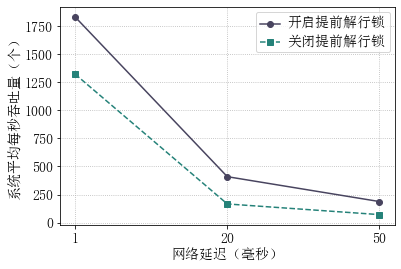

In [198]:
# x轴网络延迟，y轴吞吐量，折线图，图例是否使用elr
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([1, 2, 3])
x_label = np.array([1, 20, 50])
ax.plot(x, concurrency10_operations10_elr_tps, linestyle="-", color=color1, marker="o", label="开启提前解行锁", linewidth=1.5)
ax.plot(x, concurrency10_operations10_noelr_tps, linestyle="--", color=color2, marker="s", label="关闭提前解行锁", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.xlabel("网络延迟（毫秒）", fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("系统平均每秒吞吐量（个）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

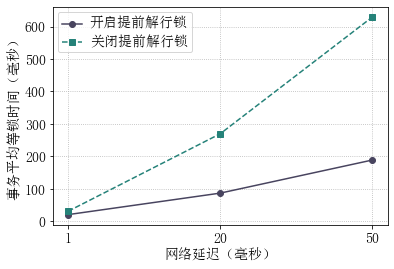

In [199]:
# x轴网络延迟，y轴等锁时间，折线图，图例是否使用elr
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([1, 2, 3])
x_label = np.array([1, 20, 50])
ax.plot(x, concurrency10_operations10_elr_lock_latency, linestyle="-", color=color1, marker="o", label="开启提前解行锁", linewidth=1.5)
ax.plot(x, concurrency10_operations10_noelr_lock_latency, linestyle="--", color=color2, marker="s", label="关闭提前解行锁", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.xlabel("网络延迟（毫秒）", fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("事务平均等锁时间（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

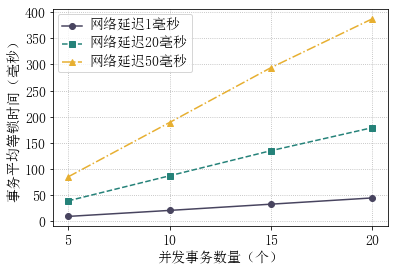

In [200]:
# x轴并发事务数量，y轴事务延迟，折线图，图例为网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([1, 2, 3, 4])
x_label = np.array([5, 10, 15, 20])
plt.plot(x, operations10_delay1_lock_latency, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, operations10_delay20_lock_latency, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, operations10_delay50_lock_latency, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("并发事务数量（个）", fontproperties=font)
plt.ylabel("事务平均等锁时间（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

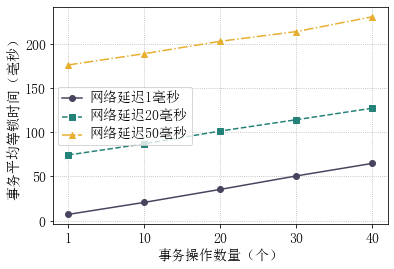

In [201]:
# x轴事务操作数量，y轴事务延迟，折线图，图例为网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([1, 2, 3, 4, 5])
x_label = np.array([1, 10, 20, 30, 40])
plt.plot(x, concurrency10_delay1_lock_latency, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, concurrency10_delay20_lock_latency, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, concurrency10_delay50_lock_latency, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务操作数量（个）", fontproperties=font)
plt.ylabel("事务平均等锁时间（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

In [202]:
# 死锁事务 
# 死锁环路长度对检测时间/检测成功率的影响
concurrencys = np.array([12, 18, 24, 36, 48])
chains1_delay1_txn_latency = np.array([4028514.231, 5446545.898, 6563237.018, 7469835.332, 8373606.804]) / 1000
chains1_delay1_deadlock_latency = np.array([3694915.233, 4946649.025, 6305992.808, 7176702.642, 8250959.130]) / 1000
chains1_delay1_success = np.array([0.984, 0.966, 0.764, 0.743, 0.037]) * 100

# 死锁环路数量对检测时间/检测成功率的影响
chains = np.array([1, 2, 3, 4, 5])
concurrencys24_delay1_txn_latency = np.array([4028514.231, 4069991.790, 4216431.873, 4643444.261, 4729779.784]) / 1000
concurrencys24_delay1_deadlock_latency = np.array([3694915.233, 3736284.125, 3859242.510, 4238439.821, 4268020.403]) / 1000
concurrencys24_delay1_success = np.array([0.984, 0.975, 0.969, 0.872, 0.804]) * 100

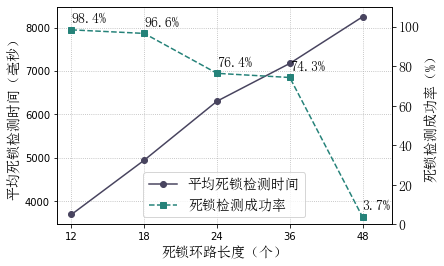

In [203]:
# x轴并发事务数量，y轴死锁检测时间/成功率，折线图，图例为不同指标
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax1 = plt.gca()

x = np.array([1, 2, 3, 4, 5])
x_label = np.array([12, 18, 24, 36, 48])
ax1.plot(x, chains1_delay1_deadlock_latency, linestyle="-", color=color1, marker="o", label="平均死锁检测时间", linewidth=1.5)
ax1.set_xlabel("死锁环路长度（个）", fontproperties=font)
ax1.set_ylabel("平均死锁检测时间（毫秒）", fontproperties=font)

ax2 = ax1.twinx()
ax2.plot(x, chains1_delay1_success, linestyle="--", color=color2, marker="s", label="死锁检测成功率", linewidth=1.5)
ax2.set_ylabel("死锁检测成功率（%）", fontproperties=font)
for i, j in zip(x, chains1_delay1_success):
    ax2.annotate('{:.1f}%'.format(j), (i, j), textcoords="offset points", xytext=(0,5), ha="left", va="bottom", fontproperties=font)
ax2.set_xlim(0.8, 5.4)
ax2.set_ylim(0, 110)

plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)

line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='lower center', prop=font)

plt.show()

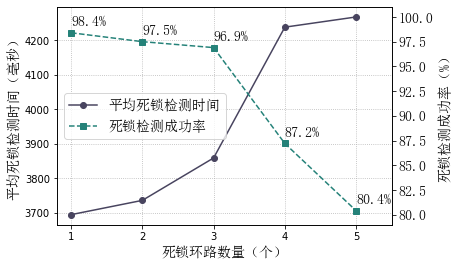

In [204]:
# x轴并发事务数量，y轴死锁检测时间/成功率，折线图，图例为不同指标
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax1 = plt.gca()

x = np.array([1, 2, 3, 4, 5])
ax1.plot(x, concurrencys24_delay1_deadlock_latency, linestyle="-", color=color1, marker="o", label="平均死锁检测时间", linewidth=1.5)
ax1.set_ylabel("平均死锁检测时间（毫秒）", fontproperties=font)
ax1.set_xlabel("死锁环路数量（个）", fontproperties=font)

ax2 = ax1.twinx()
ax2.plot(x, concurrencys24_delay1_success, linestyle="--", color=color2, marker="s", label="死锁检测成功率", linewidth=1.5)
ax2.set_ylabel("死锁检测成功率（%）", fontproperties=font)
for i, j in zip(x, concurrencys24_delay1_success):
    ax2.annotate('{:.1f}%'.format(j), (i, j), textcoords="offset points", xytext=(0,5), ha="left", va="bottom", fontproperties=font)
ax2.set_xlim(0.8, 5.5)
ax2.set_ylim(79, 101)

plt.xticks(x, fontproperties=font)
plt.yticks(fontproperties=font)

line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='center left', prop=font)

plt.show()

In [205]:
# 并发事务
# 网络延迟对本地事务事务开启/读写操作的影响
delays = np.array([1, 20, 50])
participants1_operations10_tps = np.array([1409.713, 167.603, 70.160])
participants1_operations10_txn_latency = np.array([6784.068, 58719.350, 141744.652]) / 1000
participants1_operations10_commit_latency = np.array([3504.532, 55505.056, 138213.202]) / 1000

# 读写操作比例的影响
readonlys = np.array([0, 20, 40, 60, 80, 100])
operations20_tps = np.array([2631.893, 2642.030, 2701.720, 3125.930, 3855.960, 5253.110])
operations20_txn_latency = np.array([16527.952, 13826.335, 11666.299, 9657.541, 7895.451, 6686.944]) / 1000
operations20_commit_latency = np.array([4941.646, 3462.890, 2504.390, 1674.932, 918.936, 203.460]) / 1000

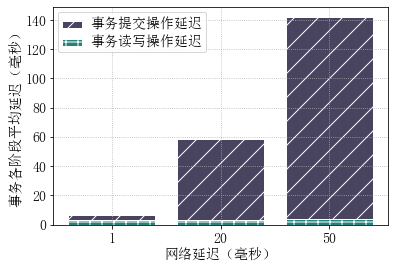

In [206]:
# x轴网络延迟，y轴事务延迟，堆叠柱状图，图例延迟类型
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax = plt.gca()

x = np.array([1, 2, 3])
x_label = np.array([1, 20, 50])
participants1_operations10_rw_latency = participants1_operations10_txn_latency - participants1_operations10_commit_latency
bar_txn_latency = plt.bar(x, participants1_operations10_txn_latency, label="事务提交操作延迟", color=color1, edgecolor="white", hatch="/")
bar_rw_latency = plt.bar(x, participants1_operations10_rw_latency, label="事务读写操作延迟", color=color2, edgecolor="white", hatch="+")
plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("网络延迟（毫秒）", fontproperties=font)
plt.ylabel("事务各阶段平均延迟（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.show()

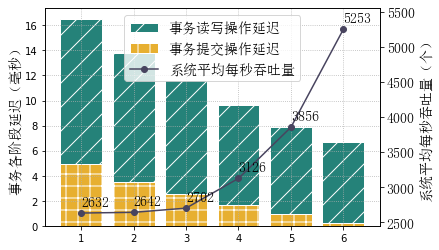

In [207]:
# x轴只读事务比例，y轴吞吐量/事务延迟，折线图/堆叠直方图，图例为不同指标
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax1 = plt.gca()

x = np.array([1, 2, 3, 4, 5, 6])
x_label = np.array([0, 20, 40, 60, 80, 100])
bar_txn_latency = ax1.bar(x, operations20_txn_latency, label="事务读写操作延迟", color=color2, edgecolor="white", hatch="/")
bar_rw_latency = ax1.bar(x, operations20_commit_latency, label="事务提交操作延迟", color=color3, edgecolor="white", hatch="+")
ax1.set_ylabel("事务各阶段延迟（毫秒）", fontproperties=font)

ax2 = ax1.twinx()
ax2.plot(x, operations20_tps, linestyle="-", color=color1, marker="o", label="系统平均每秒吞吐量", linewidth=1.5)
ax2.set_ylabel("系统平均每秒吞吐量（个）", fontproperties=font)
ax2.set_xlabel("只读事务比例（%）", fontproperties=font)
for i, j in zip(x, operations20_tps):
    ax2.annotate('{:.0f}'.format(j), (i, j), textcoords="offset points", xytext=(0,5), ha="left", va="bottom", fontproperties=font)
ax2.set_ylim(2450, 5550)

plt.xticks(x, fontproperties=font)
plt.yticks(fontproperties=font)

line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='upper center', prop=font)

plt.show()

In [ ]:
# 单线程多连接扩展能力
concurrencys = np.array([12, 24, 36, 48, 60, 72, 84])
threads1_operations20_tps = np.array([133.703, 233.007, 333.533, 434.530, 499.767, 565.620, 605.043])
threads1_operations20_latency = np.array([64810.119, 68794.384, 71069.795, 73380.586, 77907.700, 82015.863, 85707.247]) / 1000

In [ ]:
# 长时间运行能力
times = np.array([30, 60, 90, 120, 150])
disk_usage_sherry = np.array([16, 16, 16, 16, 16])
disk_usage_dike = np.array([])

analyze_time_sherry = np.array([2.881, 2.881, 2.881, 2.881, 2.881])
analyze_time_dike = np.array([])